# Lab 10: Searching Analysis

Paste your completed search functions below, then work through the three experiments.

For each experiment: **run the code**, then **answer the questions** in the markdown cells.

In [1]:
"""
Lab 10: Searching — From Linear Scan to Divide and Conquer

In this lab you will implement two search algorithms and then
create versions that count comparisons so you can measure
their performance.

Complete the four functions marked with TODO.
Do NOT change the function signatures.

Run tests:
    pytest -v
"""


# ── TODO 1: Sequential Search ────────────────────────────────────


def sequential_search(a_list, target):
    """
    Search for target in a_list by checking each item from the start.

    Args:
        a_list: A list of items (not necessarily sorted).
        target: The item to search for.

    Returns:
        True if target is found, False otherwise.
    """
    for item in a_list:
        if item == target:
            return True

    return False


# ── TODO 2: Binary Search ────────────────────────────────────────


def binary_search(a_list, target):
    """
    Search for target in a sorted list by repeatedly halving
    the search space.

    The list MUST be sorted in ascending order for this to work.

    Algorithm:
        1. Set first = 0, last = len(a_list) - 1
        2. While first <= last:
           - Compute mid = (first + last) // 2
           - If a_list[mid] == target → return True
           - If target < a_list[mid] → search the left half (last = mid - 1)
           - If target > a_list[mid] → search the right half (first = mid + 1)
        3. If the loop ends → return False

    Args:
        a_list: A sorted list of items.
        target: The item to search for.

    Returns:
        True if target is found, False otherwise.
    """
    first = 0
    last = len(a_list) - 1

    while first <= last:
        mid = (first + last) // 2
        if a_list[mid] == target:
            return True
        elif target < a_list[mid]:
            last = mid - 1
        else:
            first = mid + 1

    return False


# ── TODO 3: Counted Versions ─────────────────────────────────────


def sequential_search_counted(a_list, target):
    """
    Same as sequential_search, but also counts comparisons.

    A "comparison" is each time you check whether a list element
    equals the target.

    Args:
        a_list: A list of items (not necessarily sorted).
        target: The item to search for.

    Returns:
        A tuple (found, comparisons) where:
            found: True if target is in the list, False otherwise.
            comparisons: The number of element-to-target comparisons made.

    Example:
        sequential_search_counted([4, 8, 2, 15, 17], 17)  → (True, 5)
        sequential_search_counted([4, 8, 2, 15, 17], 99)  → (False, 5)
    """
    comparisons = 0
    for item in a_list:
        comparisons += 1
        if item == target:
            return True, comparisons

    return False, comparisons


def binary_search_counted(a_list, target):
    """
    Same as binary_search, but also counts comparisons.

    A "comparison" is each time you check a_list[mid] against the target.
    Count one comparison per loop iteration (the mid check).

    Args:
        a_list: A sorted list of items.
        target: The item to search for.

    Returns:
        A tuple (found, comparisons) where:
            found: True if target is in the list, False otherwise.
            comparisons: The number of midpoint-to-target comparisons made.

    Example:
        binary_search_counted([2, 4, 8, 15, 17], 17)  → (True, 3)
        binary_search_counted([2, 4, 8, 15, 17], 99)  → (False, 3)
    """
    comparisons = 0
    first = 0
    last = len(a_list) - 1

    while first <= last:
        mid = (first + last) // 2
        comparisons += 1
        if a_list[mid] == target:
            return True, comparisons
        elif target < a_list[mid]:
            last = mid - 1
        else:
            first = mid + 1

    return False, comparisons





In [2]:
# Imports for the experiments
import random
import matplotlib.pyplot as plt

---
## Experiment 1: The Comparison Race

Run both counted searches on sorted lists of increasing size and plot the comparison counts.

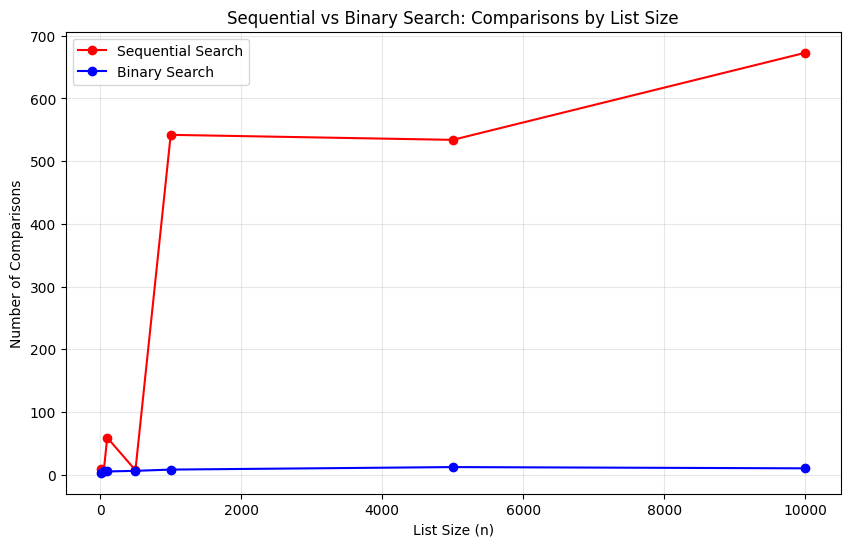

In [3]:
sizes = [10, 50, 100, 500, 1000, 5000, 10000]
seq_counts = []
bin_counts = []

for n in sizes:
    # Generate a sorted list of n items
    test_list = list(range(n))
    # Pick a random target (might or might not be in the list)
    target = random.randint(0, n)

    _, s_count = sequential_search_counted(test_list, target)
    _, b_count = binary_search_counted(test_list, target)

    seq_counts.append(s_count)
    bin_counts.append(b_count)

plt.figure(figsize=(10, 6))
plt.plot(sizes, seq_counts, 'o-', label='Sequential Search', color='red')
plt.plot(sizes, bin_counts, 'o-', label='Binary Search', color='blue')
plt.xlabel('List Size (n)')
plt.ylabel('Number of Comparisons')
plt.title('Sequential vs Binary Search: Comparisons by List Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Experiment 1 Questions

**Q1:** Describe the shape of each curve. Why does one grow so much faster than the other?

Binary is essentially just a striaght line which is pretty on par with how we know binary searches work. sequential uses so many more comparisons because it is itterating through so many different things but has to go through the whole list.

**Q2:** At what list size does the difference start to feel significant?

right around 1,000 different elements

---
## Experiment 2: Best Case, Worst Case

How much does performance vary depending on *where* the target is (or if it's there at all)?

In [5]:
n = 10000
test_list = list(range(n))

# Sequential search: best case vs worst case
_, seq_best = sequential_search_counted(test_list, test_list[0])      # first element
_, seq_worst = sequential_search_counted(test_list, n + 1)            # not in list

print("=== Sequential Search (n = 10,000) ===")
print(f"Best case  (first element):  {seq_best} comparisons")
print(f"Worst case (not in list):    {seq_worst} comparisons")
print()

# Binary search: does target position matter?
_, bin_first = binary_search_counted(test_list, test_list[0])         # first element
_, bin_last = binary_search_counted(test_list, test_list[-1])         # last element
_, bin_mid = binary_search_counted(test_list, test_list[n // 2])      # middle element
_, bin_miss = binary_search_counted(test_list, n + 1)                 # not in list

print("=== Binary Search (n = 10,000) ===")
print(f"First element:    {bin_first} comparisons")
print(f"Last element:     {bin_last} comparisons")
print(f"Middle element:   {bin_mid} comparisons")
print(f"Not in list:      {bin_miss} comparisons")

=== Sequential Search (n = 10,000) ===
Best case  (first element):  1 comparisons
Worst case (not in list):    10000 comparisons

=== Binary Search (n = 10,000) ===
First element:    13 comparisons
Last element:     14 comparisons
Middle element:   13 comparisons
Not in list:      14 comparisons


### Experiment 2 Questions

**Q3:** Why does sequential search have such a huge gap between best and worst case?

becuase sequential has to go through every single element. if the right comparison is all the way at the end, then it is going to go thorugh each one.


**Q4:** Why is binary search so consistent regardless of where the target is? What about the algorithm causes this?

it uses the recursion-like idea to parse through a lot faster then sequential.

---
## Experiment 3: When Is Sorting Worth It?

Binary search requires sorted data, and sorting costs O(n log n). If you have an unsorted list and need to search it *k* times, when does it pay to sort first?

**The two options:**
- **Option A:** Sequential search each time. Total cost: k × n
- **Option B:** Sort first (n log n), then binary search each time. Total cost: n log n + k × log n

### Q5: Calculate the crossover

For n = 10,000: set the two cost formulas equal and solve for *k*. Show your work.

*Your answer:*
10,000k = 40,000 + 4k =   k = 4 + 4k/10,000


In [6]:
import math

n = 10000
log_n = math.log2(n)  # approximately 13.3

# Try different values of k and compare total costs
print(f"n = {n}, log2(n) ≈ {log_n:.1f}")
print(f"{'k':>5}  {'Option A (k×n)':>15}  {'Option B (n·log n + k·log n)':>30}  {'Winner':>8}")
print("-" * 65)

for k in [1, 2, 5, 10, 13, 14, 15, 20, 50, 100]:
    cost_a = k * n
    cost_b = n * log_n + k * log_n
    winner = "A" if cost_a < cost_b else "B" if cost_b < cost_a else "Tie"
    print(f"{k:>5}  {cost_a:>15,.0f}  {cost_b:>30,.0f}  {winner:>8}")

n = 10000, log2(n) ≈ 13.3
    k   Option A (k×n)    Option B (n·log n + k·log n)    Winner
-----------------------------------------------------------------
    1           10,000                         132,890         A
    2           20,000                         132,904         A
    5           50,000                         132,944         A
   10          100,000                         133,010         A
   13          130,000                         133,050         A
   14          140,000                         133,063         B
   15          150,000                         133,076         B
   20          200,000                         133,143         B
   50          500,000                         133,542         B
  100        1,000,000                         134,206         B


### Experiment 3 Questions

**Q6:** Does the experimental crossover match your calculation? If not, why might they differ?

I don't honestly think that I did my calculation right but I think its close to what I would think.

**Q7:** Give a real-world example where you'd choose Option A (just search without sorting) and one where you'd choose Option B (sort first, then search).

if I am looking for something in a very little amount, like playing cards, I don't care to sort that stuff, I will jsut look through until I find it. but, If I have like a miillion different legos, I am going to sort that befroe looking for what I need.